# Bibliotecas

In [42]:
import pandas as pd
import numpy as np

# Base

In [3]:
base = pd.read_csv("class-grades.csv")

In [4]:
base.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,Class,Final_Int,ID,BD
0,5,57.14,NaN,64.38,51.48,52.50,Python,0.5250,0,1994-05-07
1,8,95.05,NaN,67.50,99.07,68.33,R,0.6833,1,1994-07-09
2,8,83.70,NaN,30.00,63.15,48.89,SQL,0.4889,2,1992-02-12
3,7,81.22,NaN,49.38,105.93,80.56,R,0.8056,3,1995-05-24
4,8,91.32,93.64,NaN,107.41,73.89,SQL,0.7389,4,1994-05-18


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      119 non-null    int64  
 1   Assignment  119 non-null    float64
 2   Tutorial    37 non-null     float64
 3   Midterm     108 non-null    float64
 4   TakeHome    105 non-null    float64
 5   Final       105 non-null    float64
 6   Class       107 non-null    object 
 7   Final_Int   105 non-null    float64
 8   ID          119 non-null    int64  
 9   BD          119 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 9.4+ KB


# Biblioteca Missingno

In [5]:
#!pip install missingno

In [6]:
import missingno as msno

In [7]:
## Matrix

<AxesSubplot:>

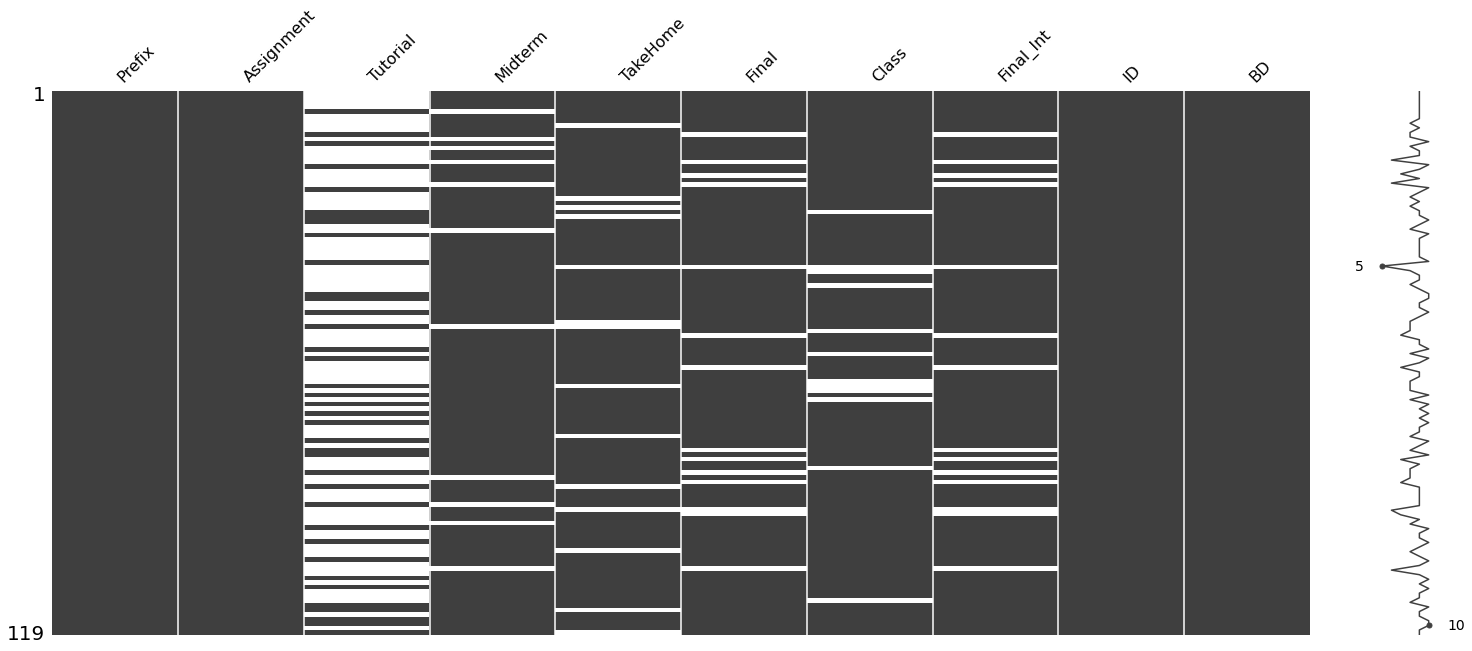

In [8]:
msno.matrix(base)

<AxesSubplot:>

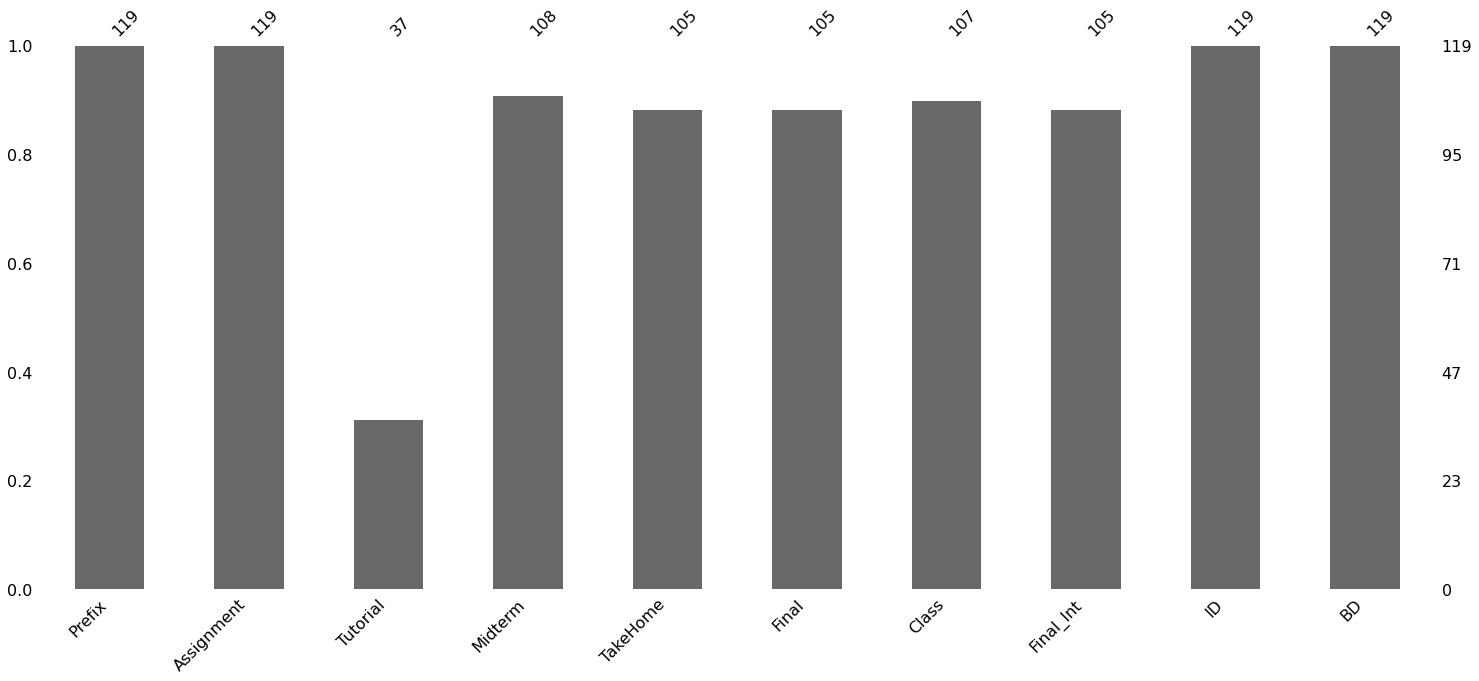

In [9]:
msno.bar(base)

<AxesSubplot:>

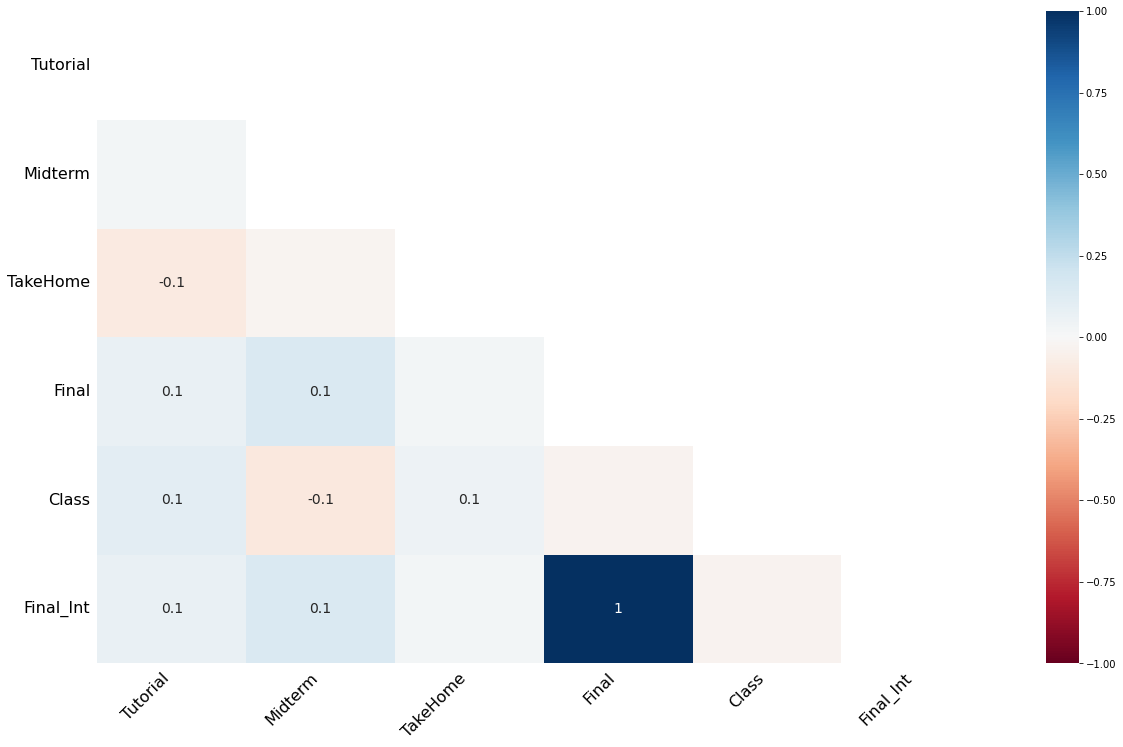

In [10]:
msno.heatmap(base)

<AxesSubplot:>

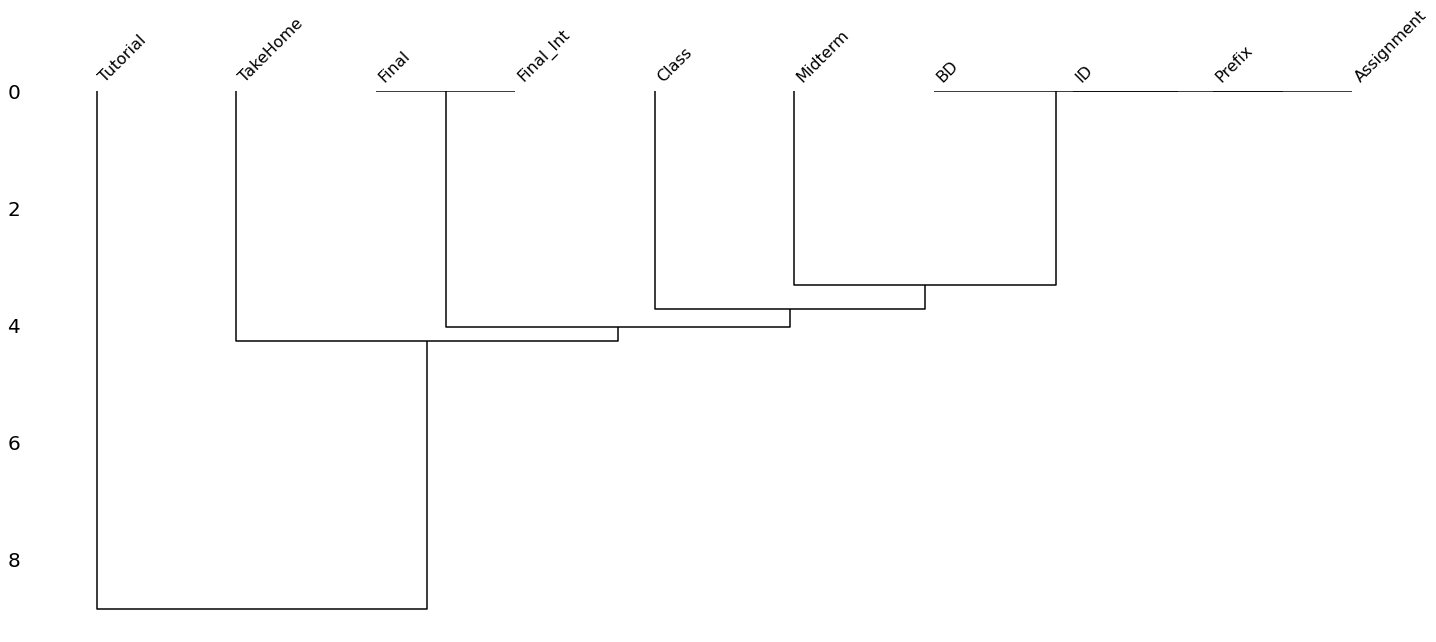

In [11]:
msno.dendrogram(base)

# Tratamento de dados redundantes

## Colunas

In [12]:
import seaborn as sns

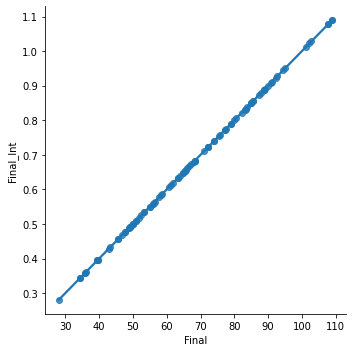

In [13]:
sns.lmplot(data=base,x='Final',y='Final_Int')

In [14]:
base.drop(columns=['Final_Int'],inplace=True)

## Redundantes em linhas

In [15]:
base.head()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final,Class,ID,BD
0,5,57.14,NaN,64.38,51.48,52.50,Python,0,1994-05-07
1,8,95.05,NaN,67.50,99.07,68.33,R,1,1994-07-09
2,8,83.70,NaN,30.00,63.15,48.89,SQL,2,1992-02-12
3,7,81.22,NaN,49.38,105.93,80.56,R,3,1995-05-24
4,8,91.32,93.64,NaN,107.41,73.89,SQL,4,1994-05-18


In [16]:
base.ID.nunique() # base['ID'].nunique() 

99

In [17]:
base.shape

(119, 9)

In [18]:
base.drop_duplicates(subset=['ID'],inplace=True)

In [19]:
base.shape

(99, 9)

# Tratamento dos dados faltantes

## Eliminar a coluna inteira

In [20]:
base.drop(columns=['Tutorial'],inplace=True)

## Preenchimento com valores

In [25]:
base.groupby('Class').agg({'median'})

,Prefix,Assignment,Midterm,TakeHome,Final,ID
,median,median,median,median,median,median
Class,,,,,,
Python,7.0,84.530,63.75,75.37,58.330,58.5
R,8.0,90.020,70.94,90.74,64.025,42.5
SQL,8.0,87.725,69.69,87.59,72.220,37.0


### Preenchimento de valor baseado em conhecimento de negócio

In [27]:
#Midterm
base['Midterm'].fillna(0.0,inplace=True)

In [29]:
base[base['Midterm']==0.0]

,Prefix,Assignment,Midterm,TakeHome,Final,Class,ID,BD
4,8,91.32,0.0,107.41,73.89,SQL,4,1994-05-18
10,7,80.44,0.0,91.48,39.72,R,10,1998-04-28
12,8,97.16,0.0,93.52,63.33,R,12,1991-05-31
15,7,93.83,0.0,80.93,NaN,R,15,1992-05-24
20,8,63.40,0.0,72.78,NaN,SQL,20,1990-07-13
30,7,98.58,0.0,97.59,63.33,Python,30,1994-10-15
51,8,83.70,0.0,NaN,57.78,R,51,1990-05-04
84,6,95.60,0.0,99.81,42.78,Python,84,1993-06-21
90,8,97.33,0.0,108.89,71.11,R,90,1996-01-26
94,8,96.73,0.0,93.52,61.94,R,94,1992-08-06


### Preenchimento com estimativas de localização

In [32]:
base[base['Class']=='Python']['TakeHome'].mean()

71.42321428571428

In [34]:
#calculo das medias Takehome
media_python = base[base['Class']=='Python']['TakeHome'].mean()
media_r = base[base['Class']=='R']['TakeHome'].mean()
media_sql = base[base['Class']=='SQL']['TakeHome'].mean()

In [58]:
np.mean([media_python, media_r, media_sql])

79.6798949579832

In [36]:
#seleçao por classe

In [72]:
#inline
base.loc[(base['Class']=='Python')&(base['TakeHome'].isna()),'TakeHome'] = media_python

In [73]:
#Versão Jason
Teste_A = base['Class']=='R'

In [74]:
Teste_B = base['TakeHome'].isna()

In [75]:
Teste_C = Teste_A & Teste_B

In [76]:
base.loc[Teste_C,'TakeHome'] = media_r

In [77]:
base.loc[(base['Class']=='SQL')&(base['TakeHome'].isna()),'TakeHome'] = media_sql

In [78]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      99 non-null     int64  
 1   Assignment  99 non-null     float64
 2   Midterm     99 non-null     float64
 3   TakeHome    97 non-null     float64
 4   Final       86 non-null     float64
 5   Class       88 non-null     object 
 6   ID          99 non-null     int64  
 7   BD          99 non-null     object 
dtypes: float64(4), int64(2), object(2)
memory usage: 7.0+ KB


### Preencher valores categoricos

In [79]:
base['Class'].value_counts()

R         36
Python    30
SQL       22
Name: Class, dtype: int64

In [88]:
base['Class'].mode()

0    R
dtype: object

In [86]:
#Preencher com o valor mais frequente da coluna Classe
base['Class'].fillna('R',inplace=True)

In [89]:
Teste_A = base['Class']=='R'
Teste_B = base['TakeHome'].isna()
Teste_C = Teste_A & Teste_B
base.loc[Teste_C,'TakeHome'] = media_r

In [91]:
base[base['Final'].isna()]

,Prefix,Assignment,Midterm,TakeHome,Final,Class,ID,BD
9,7,90.10,51.25,88.89,NaN,R,9,1998-09-18
15,7,93.83,0.00,80.93,NaN,R,15,1992-05-24
18,8,55.14,75.00,56.11,NaN,R,18,1996-09-10
20,8,63.40,0.00,72.78,NaN,SQL,20,1990-07-13
38,6,90.74,61.25,83.26,NaN,R,38,1999-11-13
53,7,98.58,90.62,100.93,NaN,SQL,53,1995-11-01
60,8,71.79,41.88,24.77,NaN,Python,60,1993-11-16
78,8,97.16,83.75,95.93,NaN,Python,78,1990-06-12
80,8,81.22,79.38,105.93,NaN,Python,80,1997-07-13
83,4,86.86,92.50,85.19,NaN,R,83,1990-12-22


In [92]:
base['Final'].fillna(0,inplace=True)

In [93]:
base.tail(10)

,Prefix,Assignment,Midterm,TakeHome,Final,Class,ID,BD
89,8,97.00,64.38,90.74,58.61,R,89,1990-07-23
90,8,97.33,0.00,108.89,71.11,R,90,1996-01-26
91,8,96.41,56.25,83.26,0.00,R,91,1992-10-11
92,7,95.60,76.88,108.33,0.00,R,92,1998-05-23
93,8,87.52,56.25,71.85,85.00,SQL,93,1999-12-24
94,8,96.73,0.00,93.52,61.94,R,94,1992-08-06
95,7,85.34,41.25,93.70,39.72,R,95,1993-01-02
96,8,89.94,87.50,90.74,87.78,R,96,1996-02-17
97,7,95.60,66.25,99.81,85.56,Python,97,1999-03-14
98,8,63.40,73.12,72.78,77.22,Python,98,1995-12-24


In [94]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      99 non-null     int64  
 1   Assignment  99 non-null     float64
 2   Midterm     99 non-null     float64
 3   TakeHome    99 non-null     float64
 4   Final       99 non-null     float64
 5   Class       99 non-null     object 
 6   ID          99 non-null     int64  
 7   BD          99 non-null     object 
dtypes: float64(4), int64(2), object(2)
memory usage: 7.0+ KB


# Discretização númerica

## Cut

In [99]:
base['FAIXA_CUT'] = pd.cut(base.Assignment,3,labels=['C','B','A'])

## QCUT

In [103]:
base['FAIXA_QCUT'] =  pd.qcut(base.Assignment,3,labels=['C','B','A'])

<AxesSubplot:>

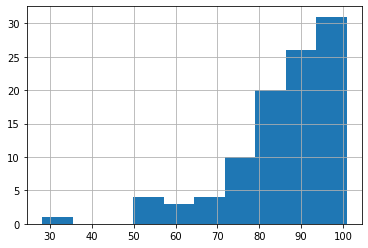

In [102]:
base.Assignment.hist()

## One Hot Enconding

### Pandas

In [106]:
dummies = pd.get_dummies(base.Class,prefix='Class',drop_first=True)

In [107]:
dummies.columns

Index(['Class_R', 'Class_SQL'], dtype='object')

In [108]:
base.loc[:,dummies.columns] = dummies

In [109]:
base

,Prefix,Assignment,Midterm,TakeHome,Final,Class,ID,BD,FAIXA_CUT,FAIXA_QCUT,Class_R,Class_SQL
0,5,57.14,64.38,51.48,52.50,Python,0,1994-05-07,B,C,0,0
1,8,95.05,67.50,99.07,68.33,R,1,1994-07-09,A,A,1,0
2,8,83.70,30.00,63.15,48.89,SQL,2,1992-02-12,A,C,0,1
3,7,81.22,49.38,105.93,80.56,R,3,1995-05-24,A,C,1,0
4,8,91.32,0.00,107.41,73.89,SQL,4,1994-05-18,A,B,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94,8,96.73,0.00,93.52,61.94,R,94,1992-08-06,A,A,1,0
95,7,85.34,41.25,93.70,39.72,R,95,1993-01-02,A,B,1,0
96,8,89.94,87.50,90.74,87.78,R,96,1996-02-17,A,B,1,0
97,7,95.60,66.25,99.81,85.56,Python,97,1999-03-14,A,A,0,0


### Sklearn

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
enc = OneHotEncoder()

In [113]:
codificacao = enc.fit_transform(base.Class.values.reshape(-1,1))

In [117]:
enc.categories_

[array(['Python', 'R', 'SQL'], dtype=object)]

In [118]:
dummies_2 = pd.DataFrame(codificacao.toarray(),columns=enc.categories_)

In [119]:
dummies_2.head()

,Python,R,SQL
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [123]:
enc.transform(np.reshape(['R','Python','SQL','SQL','R'],(-1,1))).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])